# Analyze Results from Evaluation Quickstart

This notebook analyzes the results of the evaluation quickstart.

## Setup

First, we need to import our libraries:

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Data Import and Preparation

LensKit puts its output in a `csv` file:

In [4]:
results = pd.read_csv('build/eval-results-implicit.csv')
results.head()

,DataSet,Partition,Algorithm,Succeeded,BuildTime,TestTime,NUsers,NAttempted,NGood,Coverage,RMSE.ByUser,RMSE.ByRating,TopN.ActualLength,MRR,Precision,Recall,F1
0,crossfold,1,Popular,Y,0.342,0.672,0,0,0,NaN,NaN,NaN,20.0,0.400469,0.146032,0.178751,0.160743
1,crossfold,5,ItemItem-Implicit,Y,4.253,4.548,188,4030,4023,0.998263,7.151787,9.361474,20.0,0.586337,0.213564,0.284087,0.243828
2,crossfold,5,Popular,Y,0.029,0.135,0,0,0,NaN,NaN,NaN,20.0,0.386474,0.153989,0.161811,0.157803
3,crossfold,1,ItemItem-Implicit,Y,3.647,4.571,189,3658,3654,0.998907,7.362704,9.545303,20.0,0.640739,0.216138,0.289987,0.247675
4,crossfold,5,funkSVD-Implicit,Y,67.681,0.527,188,4030,4023,0.998263,2.784315,2.796435,20.0,0.000484,0.000266,0.000036,0.000064


In [5]:
results

,DataSet,Partition,Algorithm,Succeeded,BuildTime,TestTime,NUsers,NAttempted,NGood,Coverage,RMSE.ByUser,RMSE.ByRating,TopN.ActualLength,MRR,Precision,Recall,F1
0,crossfold,1,Popular,Y,0.342,0.672,0,0,0,NaN,NaN,NaN,20.0,0.400469,0.146032,0.178751,0.160743
1,crossfold,5,ItemItem-Implicit,Y,4.253,4.548,188,4030,4023,0.998263,7.151787,9.361474,20.0,0.586337,0.213564,0.284087,0.243828
2,crossfold,5,Popular,Y,0.029,0.135,0,0,0,NaN,NaN,NaN,20.0,0.386474,0.153989,0.161811,0.157803
3,crossfold,1,ItemItem-Implicit,Y,3.647,4.571,189,3658,3654,0.998907,7.362704,9.545303,20.0,0.640739,0.216138,0.289987,0.247675
4,crossfold,5,funkSVD-Implicit,Y,67.681,0.527,188,4030,4023,0.998263,2.784315,2.796435,20.0,0.000484,0.000266,0.000036,0.000064
5,crossfold,1,funkSVD-Implicit,Y,66.152,0.454,189,3658,3654,0.998907,2.776143,2.723304,20.0,0.000000,0.000000,0.000000,0.000000
6,crossfold,4,funkSVD-Implicit,Y,63.813,0.576,188,3808,3804,0.998950,2.790371,2.768499,20.0,0.000693,0.000798,0.000821,0.000809
7,crossfold,4,ItemItem-Implicit,Y,3.175,3.328,188,3808,3804,0.998950,7.525110,9.482841,20.0,0.575760,0.210106,0.271761,0.236989
8,crossfold,4,Popular,Y,0.043,0.106,0,0,0,NaN,NaN,NaN,20.0,0.421084,0.154255,0.185217,0.168324
9,crossfold,5,PF-Implicit,Y,3947.441,0.436,188,4030,4023,0.998263,3.105920,3.115971,20.0,0.007979,0.004521,0.000689,0.001196


We ran each algorithm 5 times since we used 5-fold cross-validation.  What we want to do next is compute the average value of each metric for each data set.

In [5]:
agg_results = results.drop(['Partition'], axis=1).groupby(['Algorithm','lambda','Beta']).mean()
agg_results

KeyError: 'lambda'

In [6]:
agg_results = results.drop(['Partition'], axis=1).groupby(['Algorithm']).mean()
agg_results

,BuildTime,TestTime,NUsers,NAttempted,NGood,Coverage,RMSE.ByUser,RMSE.ByRating,TopN.ActualLength,MRR,Precision,Recall,F1
Algorithm,,,,,,,,,,,,,
ItemItem-Implicit,3.4180,3.8666,188.6,4000.0,3996.4,0.999086,7.454359,9.450317,20.0,0.600689,0.217750,0.276872,0.243477
PF-Implicit,3861.3014,0.3566,188.6,4000.0,3996.4,0.999086,3.117073,3.106311,20.0,0.003718,0.002071,0.000344,0.000587
Popular,0.0930,0.2134,0.0,0.0,0.0,NaN,NaN,NaN,20.0,0.416193,0.155564,0.170914,0.162548
funkSVD-Implicit,64.4354,0.4106,188.6,4000.0,3996.4,0.999086,2.793650,2.784971,20.0,0.000235,0.000213,0.000171,0.000175


In [7]:
res_slim = results.loc[results['lambda'].notnull(), :]

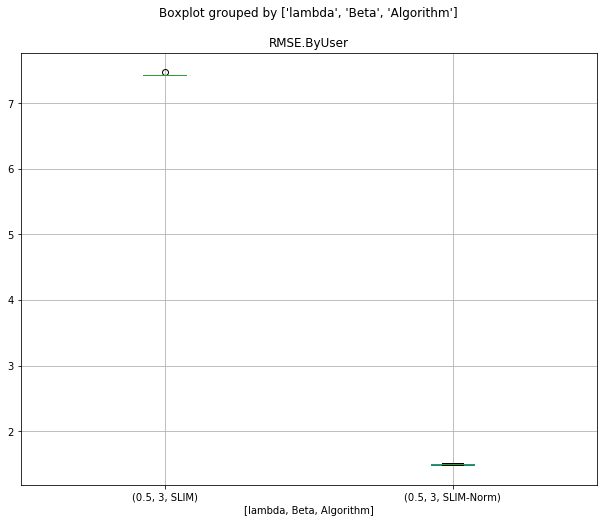

In [8]:
res_slim.boxplot(['RMSE.ByUser'], ['lambda','Beta','Algorithm'], figsize=(10, 8))

## Plotting Results

Let's start plotting things. What's the RMSE achieved by each algorithm?

In [9]:
df = results.loc[results['lambda'].notnull(),['lambda', 'RMSE.ByUser']].groupby('lambda').mean()
# df.plot.scatter(x=df['lambda'], y=df['RMSE.ByUser'])

/home/mtian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.5, right=0.5
  'left=%s, right=%s') % (left, right))


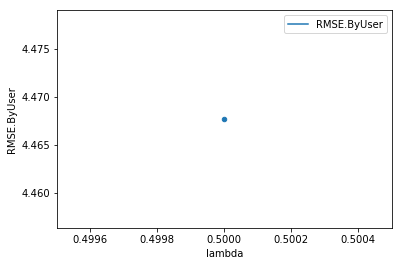

In [10]:
ax = df.reset_index().plot.scatter(y='RMSE.ByUser', x='lambda')
df.plot(ax=ax)

Next up: nDCG

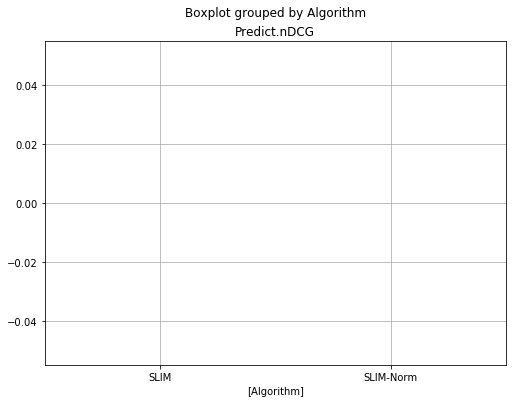

In [11]:
results.loc[:,['Algorithm', 'Predict.nDCG']].boxplot(by='Algorithm', figsize=(8,6))

Finally, the build and test times.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A6C29E710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000021A6C6A3BE0>], dtype=object)

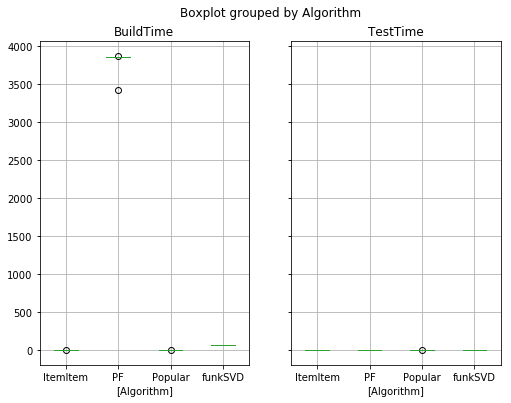

In [6]:
results.loc[:,['Algorithm', 'BuildTime', 'TestTime']].boxplot(by='Algorithm', figsize=(8,6))

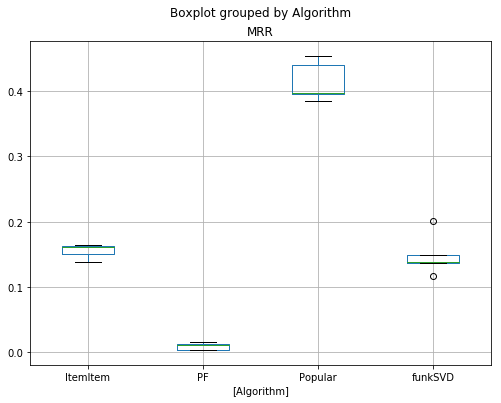

In [7]:
results.loc[:,['Algorithm', 'MRR']].boxplot(by='Algorithm', figsize=(8,6))

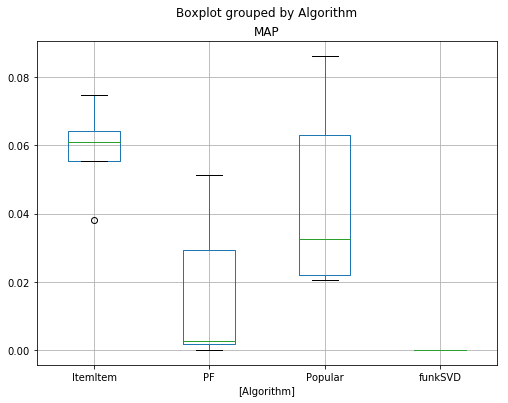

In [5]:
results.loc[:,['Algorithm', 'MAP']].boxplot(by='Algorithm', figsize=(8,6))

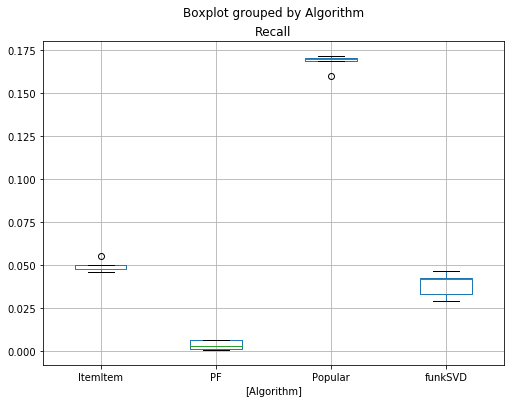

In [8]:
results.loc[:,['Algorithm', 'Recall']].boxplot(by='Algorithm', figsize=(8,6))

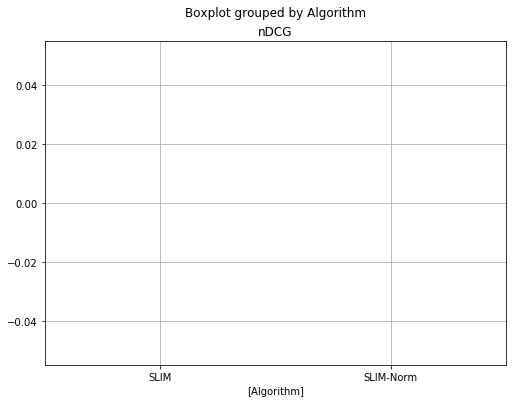

In [15]:
results.loc[:,['Algorithm', 'nDCG']].boxplot(by='Algorithm', figsize=(8,6))